# Day 1 Machine learning in Python - Exercises

## Exercise 1

#### Question 1
##### Import the required packages.
##### Set the working directory to data directory.
##### Print the working directory and the plot directory.

In [149]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from matplotlib import cm

In [150]:
# Set `home_dir` to the root directory of your computer.
home_dir = Path.home()
# Set `main_dir` to the location of your `skillsoft-intro-to-machine-learning-in-python` folder.
main_dir = home_dir / "Documents" / "Learning/percipio/machine-learning-bootcamp"
# Make `data_dir` from the `main_dir` and
# remainder of the path to data directory.
data_dir = main_dir / "data"
# Create a plot directory to save our plots
plot_dir = main_dir / "plots"

In [151]:
os.chdir(data_dir)

print(data_dir)
print(plot_dir)

/Users/bnpaulus/Documents/Learning/percipio/machine-learning-bootcamp/data
/Users/bnpaulus/Documents/Learning/percipio/machine-learning-bootcamp/plots


#### Answer: 

#### Question 2

##### Load the dataset `fast_food_data.csv` and save it as `ex_subset`.

##### Print the first few rows of `ex_subset` and its summary using describe().

##### Drop all the non-numerical columns from `ex_subset` and print the few rows again to see what the dataframe looks like.

In [152]:
ex_subset = pd.read_csv("fast_food_data.csv")
ex_subset.head()

,Fast Food Restaurant,Item,Type,Serving Size (g),Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),Sugars (g),Protein (g),Revenue 2016 (billion dollars)
0,McDonald's,Hamburger,Burger,98,240,8.0,3.0,0.0,480,32.0,6.0,12.0,36.4
1,McDonald's,Cheeseburger,Burger,113,290,11.0,5.0,0.5,680,33.0,7.0,15.0,36.4
2,McDonald's,Big Mac,Burger,211,530,27.0,10.0,1.0,960,47.0,9.0,24.0,36.4
3,McDonald's,Quarter Pounder with Cheese,Burger,202,520,26.0,12.0,1.5,1100,41.0,10.0,30.0,36.4
4,McDonald's,Bacon Clubhouse Burger,Burger,270,720,40.0,15.0,1.5,1470,51.0,14.0,39.0,36.4


In [153]:
ex_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Fast Food Restaurant            126 non-null    object 
 1   Item                            126 non-null    object 
 2   Type                            126 non-null    object 
 3   Serving Size (g)                126 non-null    int64  
 4   Calories                        126 non-null    int64  
 5   Total Fat (g)                   126 non-null    float64
 6   Saturated Fat (g)               126 non-null    float64
 7   Trans Fat (g)                   114 non-null    float64
 8   Sodium (mg)                     126 non-null    int64  
 9   Carbs (g)                       126 non-null    float64
 10  Sugars (g)                      126 non-null    float64
 11  Protein (g)                     126 non-null    float64
 12  Revenue 2016 (billion dollars)  126 

In [154]:
# ex_subset_cleaned = ex_subset[
#     [
#         'Serving Size (g)', 
#         'Calories',
#         'Total Fat (g)',
#         'Saturated Fat (g)',
#         'Trans Fat (g)',
#         'Sodium (mg)',
#         'Carbs (g)',
#         'Sugars (g)',
#         'Protein (g)',
#         'Revenue 2016 (billion dollars)'
    
#     ]]
ex_subset = ex_subset.drop(['Fast Food Restaurant','Item','Type'], axis = 1)
ex_subset.head()                 

,Serving Size (g),Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),Sugars (g),Protein (g),Revenue 2016 (billion dollars)
0,98,240,8.0,3.0,0.0,480,32.0,6.0,12.0,36.4
1,113,290,11.0,5.0,0.5,680,33.0,7.0,15.0,36.4
2,211,530,27.0,10.0,1.0,960,47.0,9.0,24.0,36.4
3,202,520,26.0,12.0,1.5,1100,41.0,10.0,30.0,36.4
4,270,720,40.0,15.0,1.5,1470,51.0,14.0,39.0,36.4


#### Answer: 

#### Question 3

##### Check how many NAs are in each column and impute them with mean. 

##### For clustering, we will be using just the `Calories` and `Sodium (mg)` columns. Drop all the other columns from `ex_subset` and name the new dataset as `ex_cluster`. 

##### Print the first few rows of `ex_cluster` to make sure we have the correct dataset.

In [155]:
print(ex_subset.isnull().sum())
ex_subset = ex_subset.fillna(ex_subset.mean())

Serving Size (g)                   0
Calories                           0
Total Fat (g)                      0
Saturated Fat (g)                  0
Trans Fat (g)                     12
Sodium (mg)                        0
Carbs (g)                          0
Sugars (g)                         0
Protein (g)                        0
Revenue 2016 (billion dollars)     0
dtype: int64


In [156]:
ex_subset.isnull().sum()

Serving Size (g)                  0
Calories                          0
Total Fat (g)                     0
Saturated Fat (g)                 0
Trans Fat (g)                     0
Sodium (mg)                       0
Carbs (g)                         0
Sugars (g)                        0
Protein (g)                       0
Revenue 2016 (billion dollars)    0
dtype: int64

In [157]:
ex_cluster = ex_subset[['Calories', 'Sodium (mg)']]
ex_cluster.head()

,Calories,Sodium (mg)
0,240,480
1,290,680
2,530,960
3,520,1100
4,720,1470


#### Answer: 

#### Question 4

##### In the dataset `ex_cluster`, check the data types for all of the columns. 
##### After making sure that all the data is numeric, scale the dataset and name it `ex_cluster_scaled`.
##### When the dataset is scaled, convert `ex_cluster_scaled` back to a pandas dataframe and make sure to name the columns again. 

##### Print out the first few rows of `ex_cluster_scaled` to make sure the column names are correct and are ready for clustering.

In [158]:
ex_cluster.dtypes

Calories       int64
Sodium (mg)    int64
dtype: object

In [159]:
scaler = MinMaxScaler()
ex_cluster_scaled = scaler.fit_transform(ex_cluster)

In [160]:
ex_cluster_scaled = pd.DataFrame(ex_cluster_scaled, columns = ex_cluster.columns)
ex_cluster_scaled.head()

,Calories,Sodium (mg)
0,0.099099,0.178423
1,0.144144,0.261411
2,0.360360,0.377593
3,0.351351,0.435685
4,0.531532,0.589212


#### Answer: 

#### Question 5

#####  Rename `ex_cluster_scaled` as `ex_kmeans`.
##### We will be using `ex_cluster_scaled` in other clustering models as well.
##### Plot the two variables from `ex_kmeans` to see their interactions. 
##### Plot `Sodium (mg)` as `y` and `Calories` as `x`.

In [161]:
ex_kmeans = ex_cluster_scaled

Text(0, 0.5, 'Sodium (mg)')

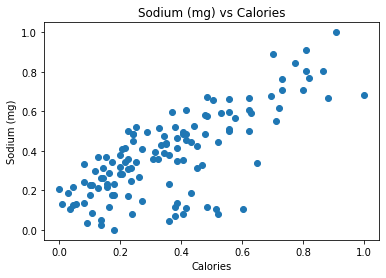

In [162]:
plt.scatter(ex_kmeans['Calories'], ex_kmeans['Sodium (mg)'], label = 'True Position')

plt.title('Sodium (mg) vs Calories')
plt.xlabel('Calories')
plt.ylabel('Sodium (mg)')

#### Answer: 

#### Question 6

##### Let's find an optimal K. 
##### Initialize the k-means with 2 clusters and name it `ex_kmeans_2`. 
##### Fit `ex_kmeans_2` with `ex_kmeans`. 
##### Predict the clusters with `ex_kmeans_2` and name the outputs as `labels`. 
##### Get the cluster centers and name it as `C_2`. 
##### Print `C_2` to see what it looks like. 


#### Answer: 

In [163]:
ex_kmeans_2 = KMeans(n_clusters=2)
ex_kmeans_2 = ex_kmeans_2.fit(ex_kmeans)

labels = ex_kmeans_2.predict(ex_kmeans)

C_2 = ex_kmeans_2.cluster_centers_
print(C_2)

[[0.25338085 0.28157403]
 [0.64658945 0.64777712]]


#### Question 7

##### Plot the data with clusters colored in and each centroid plotted.

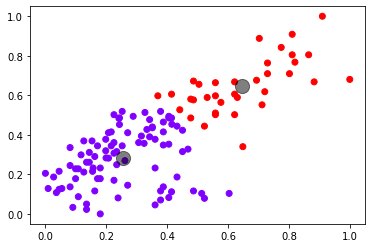

In [164]:
# First, we plot our clusters, colored in by the labels.
plt.scatter(ex_kmeans.iloc[:,0],            
            ex_kmeans.iloc[:,1], 
            c=ex_kmeans_2.labels_, 
            cmap='rainbow')

# Second, we plot the optimized centroids over the clusters.
plt.scatter(C_2[:, 0], 
            C_2[:, 1], 
            c='black', 
            s=200, 
            alpha=0.5)

#### Answer: 

## Exercise 2

#### Question 1

#####  Get the metrics we need for building an elbow plot.
##### The range for K should be from 1 to 20. 

#### Answer: 

In [165]:
# Set the range of k.
K_MAX = 20
KK = range(1, K_MAX + 1)

# Run `kmeans` for values in the range k = 1-20.
KM = [kmeans(ex_kmeans, k) for k in KK]

# Find the centroids for each KM output. 
centroids = [cent for (cent,var) in KM]

# Calculate centroids for each iteration of k. 
D_k = [cdist(ex_kmeans, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D, axis = 1) for D in D_k]
dist = [np.min(D, axis = 1) for D in D_k]

tot_withinss = [sum(d**2) for d in dist]                        # Total within-cluster sum of squares
totss = sum(pdist(ex_kmeans)**2) / ex_kmeans.shape[0]           # The total sum of squares
betweenss = totss - tot_withinss                                # The between-cluster sum of squares

#### Question 2
##### Build an elbow curve plot for KMeans clustering and find the optimal K. 

#### Answer: 

Text(0.5, 1.0, 'Elbow for KMeans clustering')

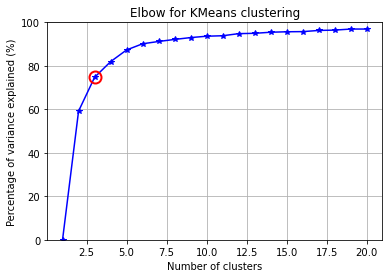

In [166]:
# Set range for k.
kIdx = 2        # K=3
clr = cm.Spectral( np.linspace(0,1,10) ).tolist()
mrk = 'os^p<dvh8>+x.'

# Elbow curve - explained variance.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(KK, betweenss/totss*100, 'b*-')
ax.plot(KK[kIdx], betweenss[kIdx]/totss*100, marker='o', markersize=12, 
        markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained (%)')
plt.title('Elbow for KMeans clustering')

#### Question 3
##### Now try the silhouette method to find the optimal number of `k`.

#### Answer:

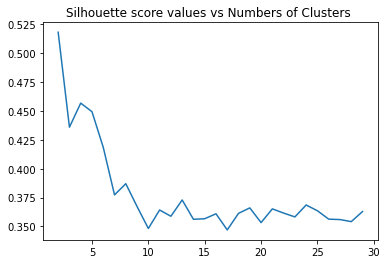

Optimal number of components is: 2


In [167]:
obs = ex_kmeans
silhouette_score_values=list()

NumberOfClusters = range(2,30)

for i in NumberOfClusters:

    classifier=cluster.KMeans(i,init='k-means++', n_init=10, 
                              max_iter=300, 
                              tol=0.0001, 
                              verbose=0, 
                              random_state=None, 
                              copy_x=True)
    classifier.fit(obs)
    labels= classifier.predict(obs)
    sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None)
    silhouette_score_values.append(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None))

plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()     

Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]

print("Optimal number of components is:", Optimal_NumberOf_Components)

#### Question 4
##### Print the explained variance for both k = 2 and the optimal k and compare.

#### Answer: 

In [168]:
# Explained variance for optimal number of clusters at `k = 2`.
print(betweenss[1]/totss * 100)

# Explained variance for optimal number of clusters at `k = 5`.
print(betweenss[2]/totss * 100)

59.16868866450529
74.71843294228522


#### Question 5
##### Initiate a new k-means cluster classifier and name it `ex_kmeans_K`, with K being the optimal number of clusters as 3.
##### Fit `ex_kmeans_K` and use the model to predict clusters and store them in a list called `labels`. 

##### Plot a scatterplot with the optimal number of clusters shown in different colors.
##### Plot the optimized centroids over the clusters.


#### Answer: 

In [169]:
ex_kmeans_3 = KMeans(n_clusters = 3)
ex_kmeans_3 = ex_kmeans_3.fit(ex_kmeans)
labels = ex_kmeans_3.predict(ex_kmeans)
C_3 = ex_kmeans_3.cluster_centers_

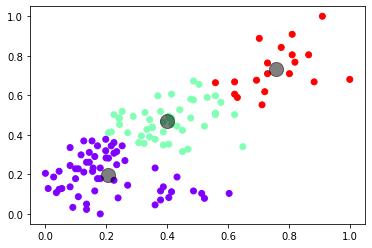

In [170]:
plt.scatter(ex_kmeans.iloc[:,0],            
            ex_kmeans.iloc[:,1], 
            c = ex_kmeans_3.labels_, 
            cmap = 'rainbow')


plt.scatter(C_3[:, 0], 
            C_3[:, 1], 
            c = 'black', 
            s = 200, 
            alpha = 0.5)

#### Question 6
##### Create a new dataframe named `clustered_ex` and populate with all the columns from `ex_cluster_scaled`. 
##### Append the list of predicted cluster, `labels`, to the `clustered_ex` dataframe. 
##### Print the `clustered_ex` dataframe to inspect the clusters.

#### Answer: 

In [171]:
clustered_ex = ex_cluster_scaled.copy()
clustered_ex['cluster'] = pd.Series(labels)

In [172]:
clustered_ex.head()

,Calories,Sodium (mg),cluster
0,0.099099,0.178423,0
1,0.144144,0.261411,0
2,0.360360,0.377593,1
3,0.351351,0.435685,1
4,0.531532,0.589212,1


#### Question 7
##### Group the `clustered_ex` dataframe by `cluster` to see the group mean of each variable.
##### Name the new dataframe as `ex_cluster_groups_means`. 
##### Print `ex_cluster_groups_means` to inspect each clusters.


#### Answer: 

In [173]:
ex_cluster_groups_means = clustered_ex.groupby('cluster').mean()
ex_cluster_groups_means

,Calories,Sodium (mg)
cluster,,
0,0.205558,0.199142
1,0.399249,0.471352
2,0.757705,0.732693
